In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import csv
import seaborn as sns

In [2]:
tweets=pd.read_csv('Donald_trump_tweets.csv')

C:\Users\omair.arshad\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (206,207,208,209,210,211,214,217,220,223,305,306,420,421,426,427,451,452,470,477,478,479,480,481,482,485,488,491,494,499,500,501,502,503,504,507,510,513,516,517,520,521,522,525,526,527,530,531,532,533,534,535,536,537,538,547,548,549,552,553,554) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweets['full_text'].head()

0    The safety of American people is my absolute h...
1    Small Business Optimism Soars to Highest Level...
2    #NeverForget #September11th \r\nhttps://t.co/l...
3                       17 years since September 11th!
4    Departing Washington, D.C. to attend a Flight ...
Name: full_text, dtype: object

In [4]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    
    return tweet

In [6]:
# Apply function to Tweet column

tweets['full_text'] = tweets['full_text'].apply(clean_tweets)

In [7]:
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omair.arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
#STOP WORDS REMOVAL
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))      
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
tweets['STOPWORD']=tweets['full_text'].apply(lambda x:' '.join([word for word in x.split()if word not in (stops)]))

In [11]:
tweets['STOPWORD'].head()

0    safety american people absolute highest priori...
1    small business optimism soars highest level ev...
2                              neverforget septemberth
3                             years since september th
4    departing washington dc attend flight septembe...
Name: STOPWORD, dtype: object

In [12]:
##SLANG REMOVAL
def translator(user_string):
    user_string = user_string.split(" ")
    
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its Abbreviation in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return(' '.join(user_string))


In [13]:
 tweets['Cleaned']=tweets['STOPWORD'].apply(translator)

In [14]:
tweets[['Cleaned']].head()

,Cleaned
0,safety american people absolute highest priori...
1,small business optimism soars highest level ev...
2,neverforget septemberth
3,years since september th
4,departing washington dc attend flight septembe...


In [15]:
col_list=['id','full_text','STOPWORD','Cleaned']

In [16]:
tweets=tweets[col_list]

In [17]:
tweets.head()

,id,full_text,STOPWORD,Cleaned
0,1039608725819088900,the safety of american people is my absolute h...,safety american people absolute highest priori...,safety american people absolute highest priori...
1,1039556378766069800,small business optimism soars to highest level...,small business optimism soars highest level ev...,small business optimism soars highest level ev...
2,1039537164458053600,neverforget septemberth,neverforget septemberth,neverforget septemberth
3,1039498334594052100,years since september th,years since september th,years since september th
4,1039489954223542300,departing washington dc to attend flight septe...,departing washington dc attend flight septembe...,departing washington dc attend flight septembe...


In [18]:
!pip install vadersentiment

In [19]:
from nltk.corpus import sentiwordnet as swn
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
sid=SentimentIntensityAnalyzer()

In [21]:
tweets['VaderValues']=tweets['full_text'].apply(lambda x: sid.polarity_scores(x))


In [22]:
tweets['VaderValues'].head()

0    {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'comp...
1    {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: VaderValues, dtype: object

In [23]:
tweets['VaderScore']=tweets['VaderValues'].apply(lambda x: x['compound'])

In [24]:
tweets['VaderScore']

0       0.8591
1       0.5423
2       0.0000
3       0.0000
4       0.0000
         ...  
2860    0.3612
2861   -0.1027
2862   -0.2960
2863    0.0000
2864    0.0000
Name: VaderScore, Length: 2865, dtype: float64

In [25]:
tweets['VaderScore']=tweets['VaderScore'].apply(lambda score: 'positive' if score >= 0.05 else('negative' if score <= -0.05  else 'neutral')) 

In [26]:
tweets['VaderScore']

0       positive
1       positive
2        neutral
3        neutral
4        neutral
          ...   
2860    positive
2861    negative
2862    negative
2863     neutral
2864     neutral
Name: VaderScore, Length: 2865, dtype: object

In [27]:
tweets=tweets.drop(columns='VaderValues', axis=0)

In [28]:
tweets.head()

,id,full_text,STOPWORD,Cleaned,VaderScore
0,1039608725819088900,the safety of american people is my absolute h...,safety american people absolute highest priori...,safety american people absolute highest priori...,positive
1,1039556378766069800,small business optimism soars to highest level...,small business optimism soars highest level ev...,small business optimism soars highest level ev...,positive
2,1039537164458053600,neverforget septemberth,neverforget septemberth,neverforget septemberth,neutral
3,1039498334594052100,years since september th,years since september th,years since september th,neutral
4,1039489954223542300,departing washington dc to attend flight septe...,departing washington dc attend flight septembe...,departing washington dc attend flight septembe...,neutral


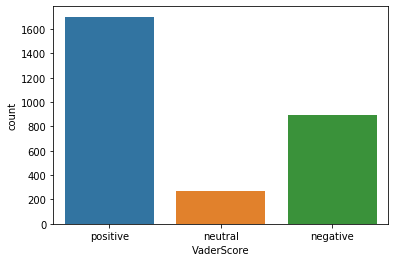

In [29]:
sns.countplot(x='VaderScore',data=tweets) # vander sentiments